In [91]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import font_manager, rc

font_path='malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

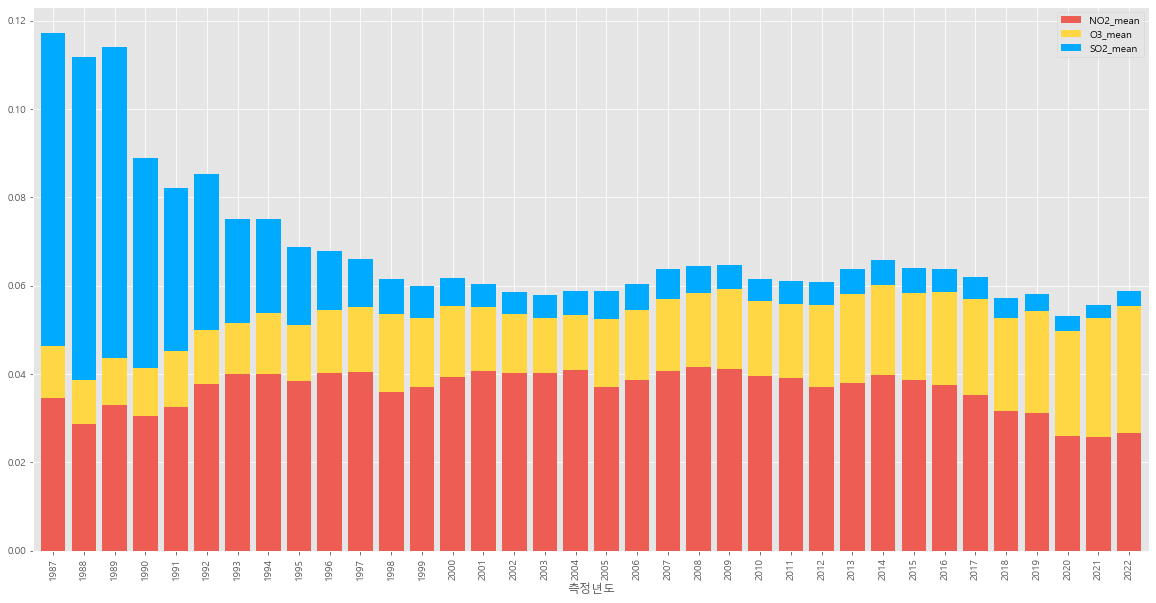

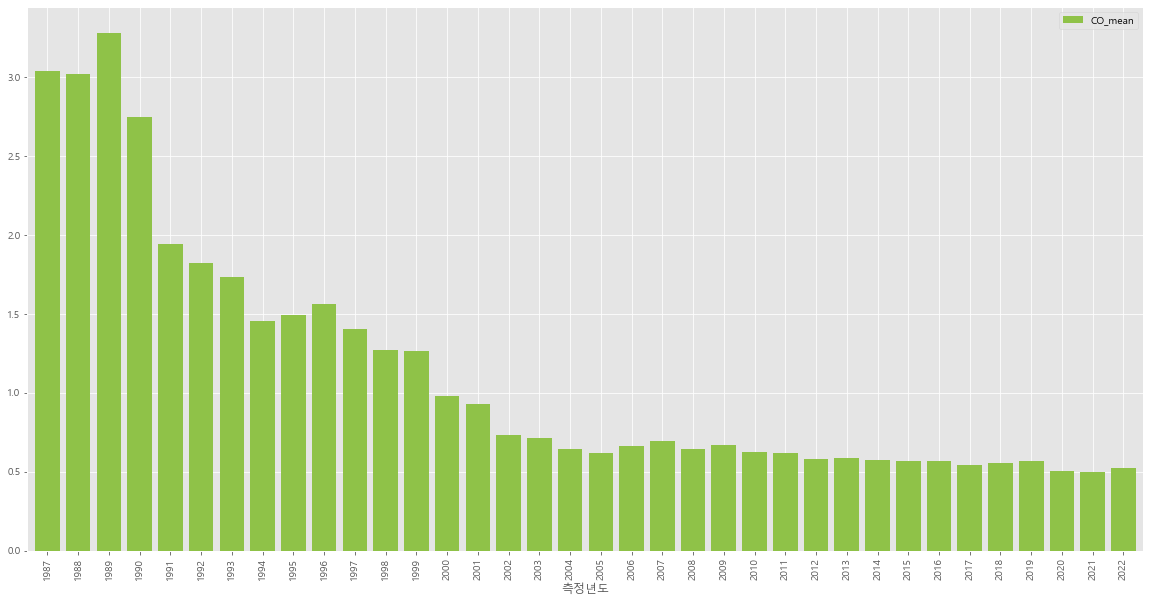

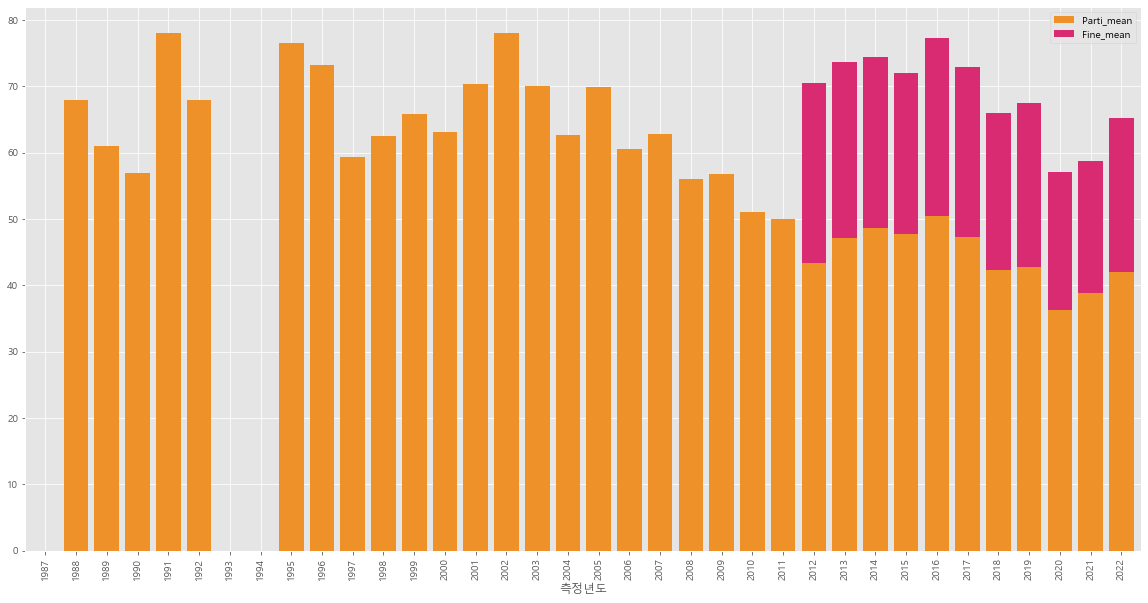

In [121]:
Seoul_air_poll_byYear= pd.read_csv('서울시 년도별 평균 대기오염도 정보.csv',encoding='cp949')

SaY_dataset=Seoul_air_poll_byYear[['측정년도','측정소명','이산화질소농도(ppm)','오존농도(ppm)','일산화탄소농도(ppm)','아황산가스(ppm)','미세먼지(㎍/㎥)','초미세먼지(㎍/㎥)']]

Seoul_air_poll_byYear.drop(['측정소명'],axis=1,inplace=True)

plt.style.use('ggplot')



Seoul_air_poll_byYear['NO2_mean']=Seoul_air_poll_byYear.groupby(['측정년도'])['이산화질소농도(ppm)'].transform('mean')
Seoul_air_poll_byYear['O3_mean']=Seoul_air_poll_byYear.groupby(['측정년도'])['오존농도(ppm)'].transform('mean')
Seoul_air_poll_byYear['CO_mean']=Seoul_air_poll_byYear.groupby(['측정년도'])['일산화탄소농도(ppm)'].transform('mean')
Seoul_air_poll_byYear['SO2_mean']=Seoul_air_poll_byYear.groupby(['측정년도'])['아황산가스(ppm)'].transform('mean')
Seoul_air_poll_byYear['Parti_mean']=Seoul_air_poll_byYear.groupby(['측정년도'])['미세먼지(㎍/㎥)'].transform('mean')
Seoul_air_poll_byYear['Fine_mean']=Seoul_air_poll_byYear.groupby(['측정년도'])['초미세먼지(㎍/㎥)'].transform('mean')

Seoul_air_poll_byYear.drop(['이산화질소농도(ppm)','오존농도(ppm)','일산화탄소농도(ppm)','아황산가스(ppm)','미세먼지(㎍/㎥)','초미세먼지(㎍/㎥)'],axis=1, inplace=True)
Seoul_air_poll_byYear.drop_duplicates(inplace=True)

Seoul_air_poll_byYear.sort_index(ascending=False,inplace=True)

mask1=Seoul_air_poll_byYear[['측정년도','NO2_mean','O3_mean','SO2_mean']]
mask2=Seoul_air_poll_byYear[['측정년도','Parti_mean','Fine_mean']]
mask3=Seoul_air_poll_byYear[['측정년도','CO_mean']]


mask1.plot(x='측정년도',kind='bar',stacked=True,figsize=(20,10),width=0.8,color=['#ed5d53','#ffd745','#00aaff'])
mask3.plot(x='측정년도',kind='bar',stacked=True,figsize=(20,10),width=0.8,color=['#8fc248'])
mask2.plot(x='측정년도',kind='bar',stacked=True,figsize=(20,10),width=0.8,color=['#ed9128','#d92b71'])

plt.savefig('연평균 미세먼지.png')


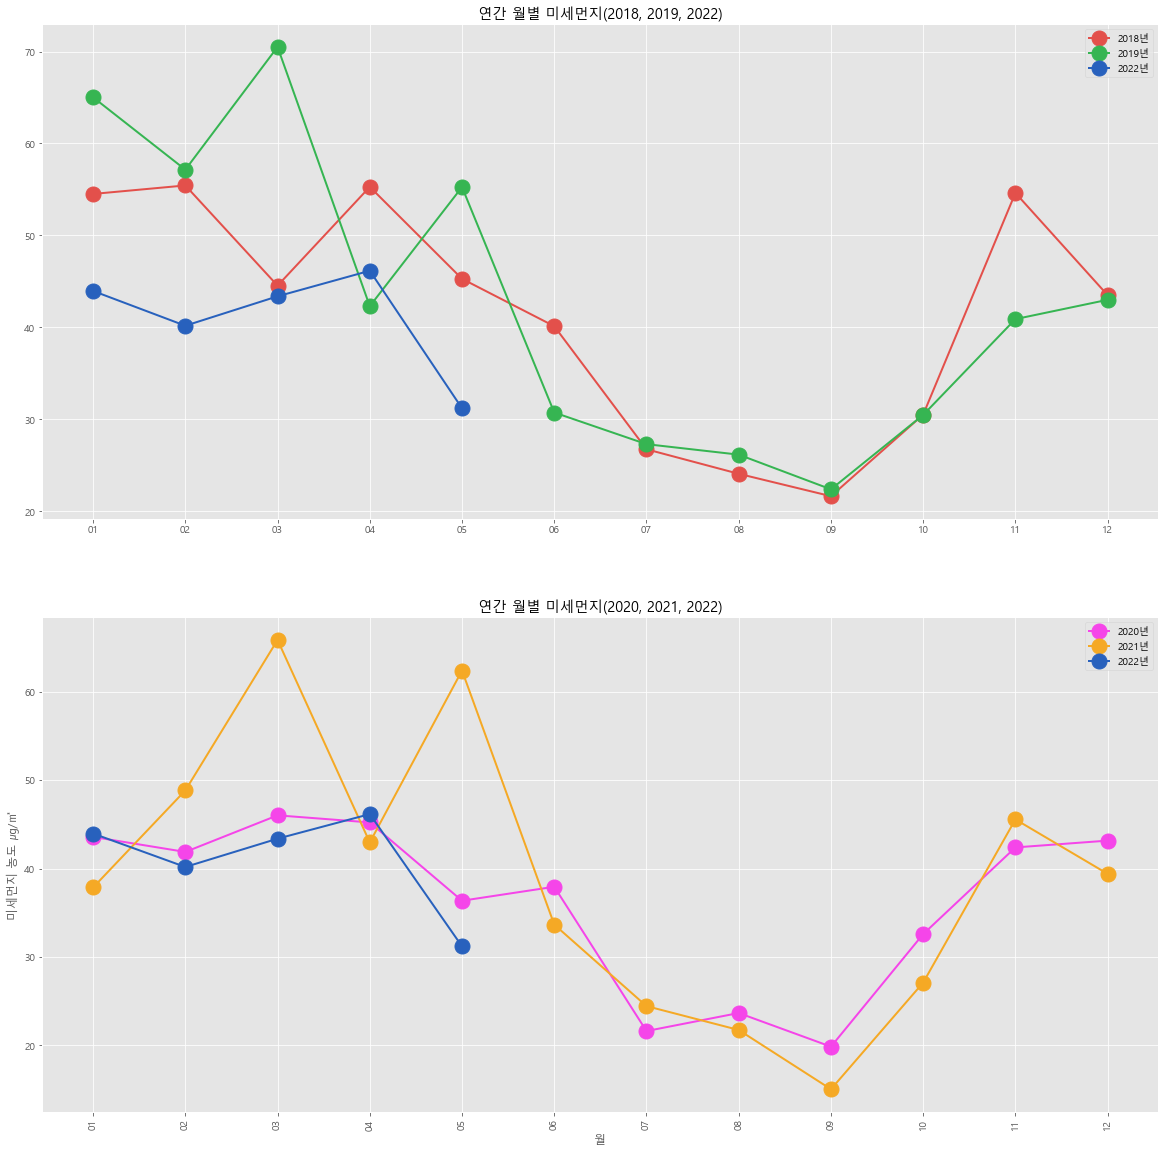

In [119]:
Seoul_air_poll_byMonth= pd.read_csv('서울시 월별 평균 대기오염도 정보.csv',encoding='cp949')

SaM_dataset=Seoul_air_poll_byMonth[['측정월','측정소명','이산화질소농도(ppm)','오존농도(ppm)','일산화탄소농도(ppm)','아황산가스(ppm)','미세먼지(㎍/㎥)','초미세먼지(㎍/㎥)']]

Seoul_air_poll_byMonth.drop(['측정소명'],axis=1,inplace=True)

plt.style.use('ggplot')


Seoul_air_poll_byMonth['NO2_mean']=Seoul_air_poll_byMonth.groupby(['측정월'])['이산화질소농도(ppm)'].transform('mean')
Seoul_air_poll_byMonth['O3_mean']=Seoul_air_poll_byMonth.groupby(['측정월'])['오존농도(ppm)'].transform('mean')
Seoul_air_poll_byMonth['CO_mean']=Seoul_air_poll_byMonth.groupby(['측정월'])['일산화탄소농도(ppm)'].transform('mean')
Seoul_air_poll_byMonth['SO2_mean']=Seoul_air_poll_byMonth.groupby(['측정월'])['아황산가스(ppm)'].transform('mean')
Seoul_air_poll_byMonth['Parti_mean']=Seoul_air_poll_byMonth.groupby(['측정월'])['미세먼지(㎍/㎥)'].transform('mean')
Seoul_air_poll_byMonth['Fine_mean']=Seoul_air_poll_byMonth.groupby(['측정월'])['초미세먼지(㎍/㎥)'].transform('mean')

Seoul_air_poll_byMonth.drop(['이산화질소농도(ppm)','오존농도(ppm)','일산화탄소농도(ppm)','아황산가스(ppm)','미세먼지(㎍/㎥)','초미세먼지(㎍/㎥)'],axis=1, inplace=True)
Seoul_air_poll_byMonth.drop_duplicates(inplace=True)

Seoul_air_poll_byMonth.sort_index(ascending=False,inplace=True)

Seoul_air_poll_byMonth['측정월']=Seoul_air_poll_byMonth['측정월'].astype('str')
dates=Seoul_air_poll_byMonth['측정월'].str.split('')

Seoul_air_poll_byMonth['Year']=+dates.str.get(1)+dates.str.get(2)+dates.str.get(3)+dates.str.get(4)
Seoul_air_poll_byMonth['Month']=dates.str.get(5)+dates.str.get(6)

#Seoul_air_poll_byMonth

mask0=(Seoul_air_poll_byMonth['Year']=='2018')
Sa_2018=Seoul_air_poll_byMonth[mask0]

mask1=(Seoul_air_poll_byMonth['Year']=='2019')
Sa_2019=Seoul_air_poll_byMonth[mask1]

mask2=(Seoul_air_poll_byMonth['Year']=='2020')
Sa_2020=Seoul_air_poll_byMonth[mask2]

mask3=(Seoul_air_poll_byMonth['Year']=='2021')
Sa_2021=Seoul_air_poll_byMonth[mask3]

mask4=(Seoul_air_poll_byMonth['Year']=='2022')
Sa_2022=Seoul_air_poll_byMonth[mask4]


fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)


plt.xticks(rotation='vertical')

plt.xlabel('월')
plt.ylabel('미세먼지 농도 ㎍/㎥')


ax1.set_title('연간 월별 미세먼지(2018, 2019, 2022)')
ax2.set_title('연간 월별 미세먼지(2020, 2021, 2022)')


ax1.plot(Sa_2018['Month'],Sa_2018['Parti_mean'],marker='o',markerfacecolor='#e3504b',markersize=15,color='#e3504b',linewidth=2,label='2018년')
ax1.plot(Sa_2019['Month'],Sa_2019['Parti_mean'],marker='o',markerfacecolor='#36b552',markersize=15,color='#36b552',linewidth=2,label='2019년')
ax2.plot(Sa_2020['Month'],Sa_2020['Parti_mean'],marker='o',markerfacecolor='#f545e9',markersize=15,color='#f545e9',linewidth=2,label='2020년')
ax2.plot(Sa_2021['Month'],Sa_2021['Parti_mean'],marker='o',markerfacecolor='#f5a925',markersize=15,color='#f5a925',linewidth=2,label='2021년')
ax1.plot(Sa_2022['Month'],Sa_2022['Parti_mean'],marker='o',markerfacecolor='#2861bd',markersize=15,color='#2861bd',linewidth=2,label='2022년')
ax2.plot(Sa_2022['Month'],Sa_2022['Parti_mean'],marker='o',markerfacecolor='#2861bd',markersize=15,color='#2861bd',linewidth=2,label='2022년')

ax1.legend(loc='best')
ax2.legend(loc='best')

plt.savefig('월평균 미세먼지.png')

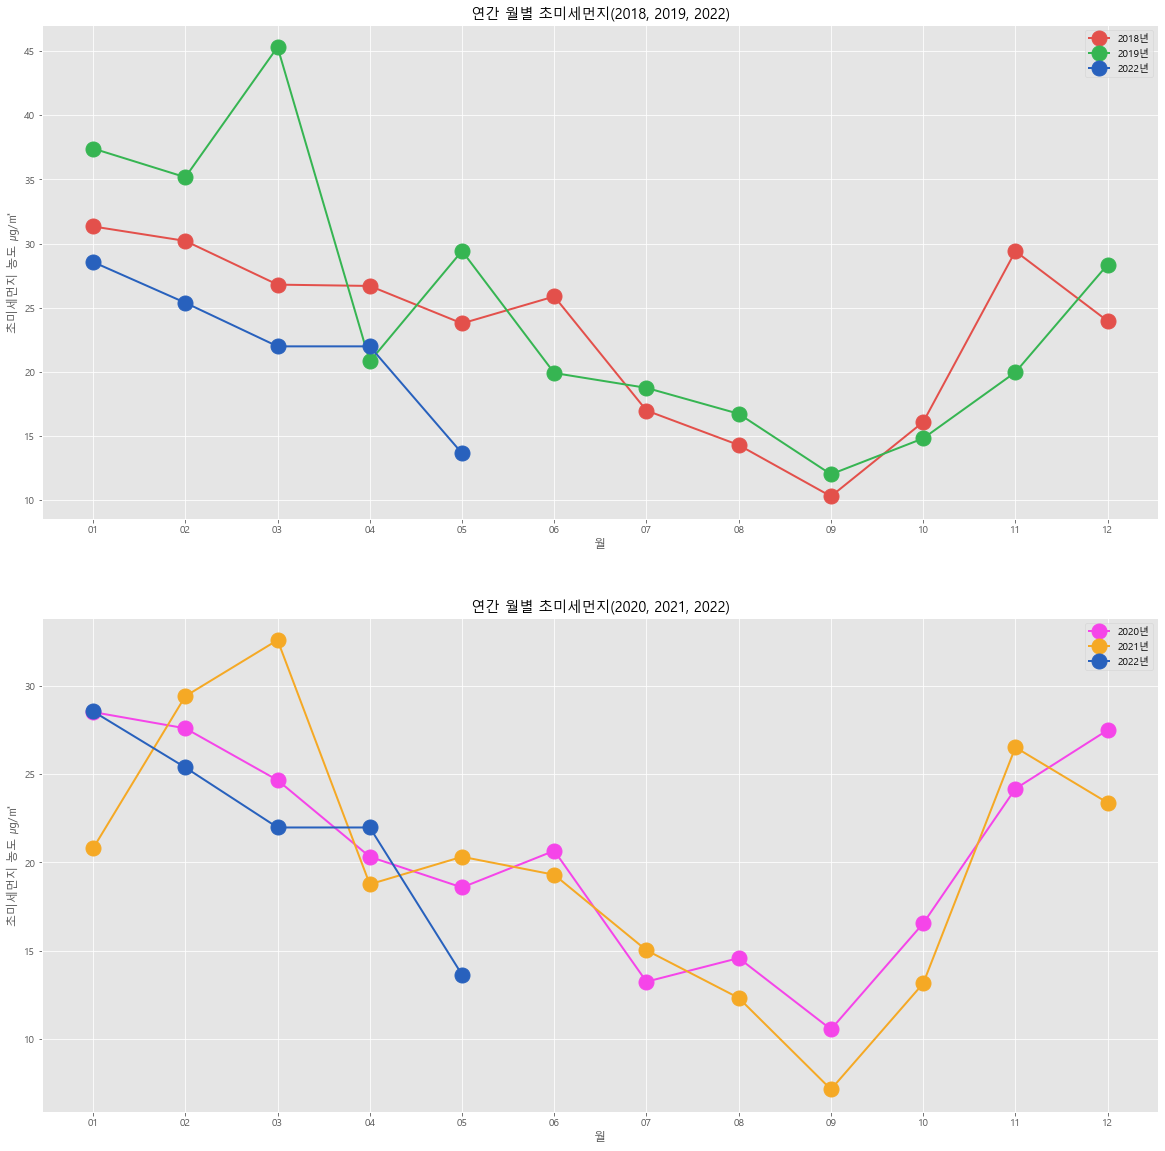

In [108]:
Seoul_air_poll_byMonth= pd.read_csv('서울시 월별 평균 대기오염도 정보.csv',encoding='cp949')

SaM_dataset=Seoul_air_poll_byMonth[['측정월','측정소명','이산화질소농도(ppm)','오존농도(ppm)','일산화탄소농도(ppm)','아황산가스(ppm)','미세먼지(㎍/㎥)','초미세먼지(㎍/㎥)']]

Seoul_air_poll_byMonth.drop(['측정소명'],axis=1,inplace=True)

plt.style.use('ggplot')


Seoul_air_poll_byMonth['NO2_mean']=Seoul_air_poll_byMonth.groupby(['측정월'])['이산화질소농도(ppm)'].transform('mean')
Seoul_air_poll_byMonth['O3_mean']=Seoul_air_poll_byMonth.groupby(['측정월'])['오존농도(ppm)'].transform('mean')
Seoul_air_poll_byMonth['CO_mean']=Seoul_air_poll_byMonth.groupby(['측정월'])['일산화탄소농도(ppm)'].transform('mean')
Seoul_air_poll_byMonth['SO2_mean']=Seoul_air_poll_byMonth.groupby(['측정월'])['아황산가스(ppm)'].transform('mean')
Seoul_air_poll_byMonth['Parti_mean']=Seoul_air_poll_byMonth.groupby(['측정월'])['미세먼지(㎍/㎥)'].transform('mean')
Seoul_air_poll_byMonth['Fine_mean']=Seoul_air_poll_byMonth.groupby(['측정월'])['초미세먼지(㎍/㎥)'].transform('mean')

Seoul_air_poll_byMonth.drop(['이산화질소농도(ppm)','오존농도(ppm)','일산화탄소농도(ppm)','아황산가스(ppm)','미세먼지(㎍/㎥)','초미세먼지(㎍/㎥)'],axis=1, inplace=True)
Seoul_air_poll_byMonth.drop_duplicates(inplace=True)

Seoul_air_poll_byMonth.sort_index(ascending=False,inplace=True)

Seoul_air_poll_byMonth['측정월']=Seoul_air_poll_byMonth['측정월'].astype('str')
dates=Seoul_air_poll_byMonth['측정월'].str.split('')

Seoul_air_poll_byMonth['Year']=+dates.str.get(1)+dates.str.get(2)+dates.str.get(3)+dates.str.get(4)
Seoul_air_poll_byMonth['Month']=dates.str.get(5)+dates.str.get(6)

#Seoul_air_poll_byMonth

mask0=(Seoul_air_poll_byMonth['Year']=='2018')
Sa_2018=Seoul_air_poll_byMonth[mask0]

mask1=(Seoul_air_poll_byMonth['Year']=='2019')
Sa_2019=Seoul_air_poll_byMonth[mask1]

mask2=(Seoul_air_poll_byMonth['Year']=='2020')
Sa_2020=Seoul_air_poll_byMonth[mask2]

mask3=(Seoul_air_poll_byMonth['Year']=='2021')
Sa_2021=Seoul_air_poll_byMonth[mask3]

mask4=(Seoul_air_poll_byMonth['Year']=='2022')
Sa_2022=Seoul_air_poll_byMonth[mask4]


fig=plt.figure(figsize=(20,20))

ax1=fig.add_subplot(2,1,1)

plt.xlabel('월')
plt.ylabel('초미세먼지 농도 ㎍/㎥')

ax2=fig.add_subplot(2,1,2)

plt.xlabel('월')
plt.ylabel('초미세먼지 농도 ㎍/㎥')


ax1.set_title('연간 월별 초미세먼지(2018, 2019, 2022)')
ax2.set_title('연간 월별 초미세먼지(2020, 2021, 2022)')


ax1.plot(Sa_2018['Month'],Sa_2018['Fine_mean'],marker='o',markerfacecolor='#e3504b',markersize=15,color='#e3504b',linewidth=2,label='2018년')
ax1.plot(Sa_2019['Month'],Sa_2019['Fine_mean'],marker='o',markerfacecolor='#36b552',markersize=15,color='#36b552',linewidth=2,label='2019년')
ax2.plot(Sa_2020['Month'],Sa_2020['Fine_mean'],marker='o',markerfacecolor='#f545e9',markersize=15,color='#f545e9',linewidth=2,label='2020년')
ax2.plot(Sa_2021['Month'],Sa_2021['Fine_mean'],marker='o',markerfacecolor='#f5a925',markersize=15,color='#f5a925',linewidth=2,label='2021년')
ax1.plot(Sa_2022['Month'],Sa_2022['Fine_mean'],marker='o',markerfacecolor='#2861bd',markersize=15,color='#2861bd',linewidth=2,label='2022년')
ax2.plot(Sa_2022['Month'],Sa_2022['Fine_mean'],marker='o',markerfacecolor='#2861bd',markersize=15,color='#2861bd',linewidth=2,label='2022년')

ax1.legend(loc='best')
ax2.legend(loc='best')

plt.savefig('월평균 초미세먼지.png')

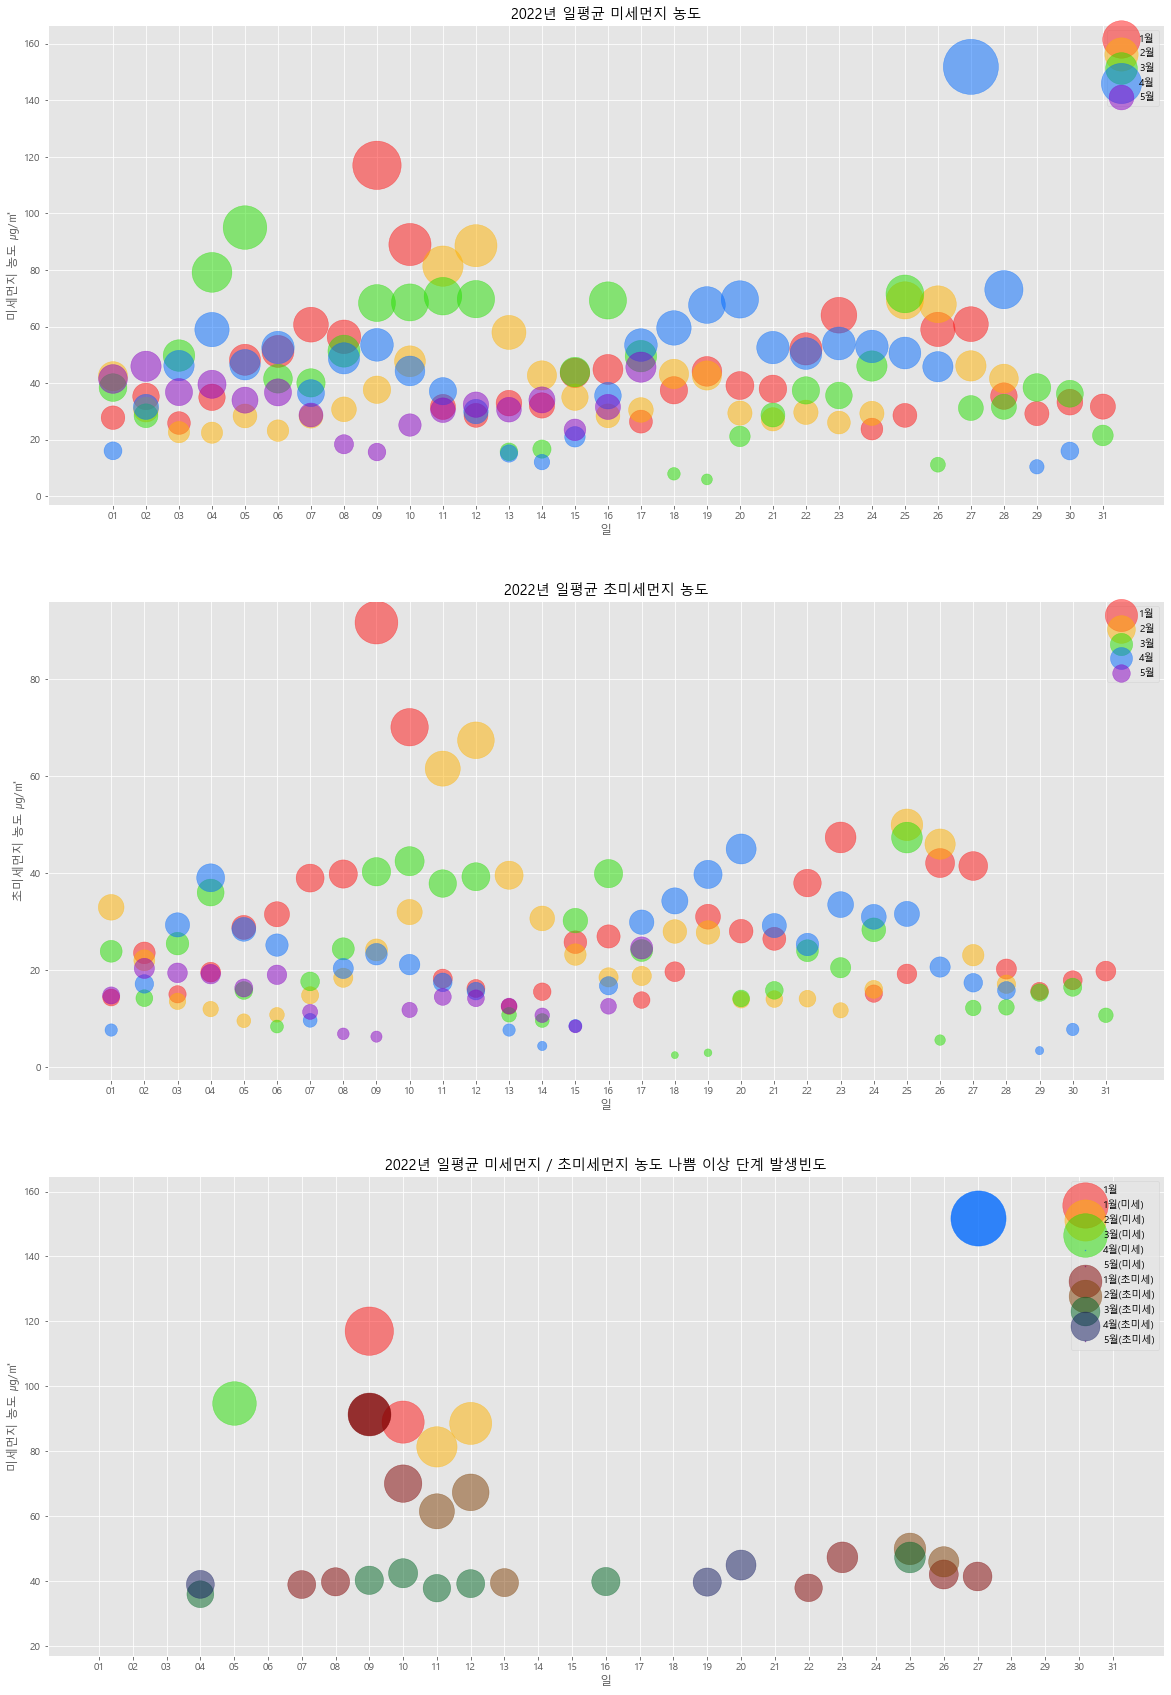

In [116]:
Seoul_air_poll_byDate= pd.read_csv('서울시 일별 평균 대기오염도 정보.csv',encoding='cp949')

SaD_dataset=Seoul_air_poll_byDate[['측정일시','측정소명','이산화질소농도(ppm)','오존농도(ppm)','일산화탄소농도(ppm)','아황산가스(ppm)','미세먼지(㎍/㎥)','초미세먼지(㎍/㎥)']]

Seoul_air_poll_byDate.drop(['측정소명'],axis=1,inplace=True)

plt.style.use('ggplot')


Seoul_air_poll_byDate['NO2_mean']=Seoul_air_poll_byDate.groupby(['측정일시'])['이산화질소농도(ppm)'].transform('mean')
Seoul_air_poll_byDate['O3_mean']=Seoul_air_poll_byDate.groupby(['측정일시'])['오존농도(ppm)'].transform('mean')
Seoul_air_poll_byDate['CO_mean']=Seoul_air_poll_byDate.groupby(['측정일시'])['일산화탄소농도(ppm)'].transform('mean')
Seoul_air_poll_byDate['SO2_mean']=Seoul_air_poll_byDate.groupby(['측정일시'])['아황산가스(ppm)'].transform('mean')
Seoul_air_poll_byDate['Parti_mean']=Seoul_air_poll_byDate.groupby(['측정일시'])['미세먼지(㎍/㎥)'].transform('mean')
Seoul_air_poll_byDate['Fine_mean']=Seoul_air_poll_byDate.groupby(['측정일시'])['초미세먼지(㎍/㎥)'].transform('mean')

Seoul_air_poll_byDate.drop(['이산화질소농도(ppm)','오존농도(ppm)','일산화탄소농도(ppm)','아황산가스(ppm)','미세먼지(㎍/㎥)','초미세먼지(㎍/㎥)'],axis=1, inplace=True)
Seoul_air_poll_byDate.drop_duplicates(inplace=True)

Seoul_air_poll_byDate.sort_index(ascending=False,inplace=True)

Seoul_air_poll_byDate['측정일시']=Seoul_air_poll_byDate['측정일시'].astype('str')
dates=Seoul_air_poll_byDate['측정일시'].str.split('')

Seoul_air_poll_byDate['Year']=dates.str.get(1)+dates.str.get(2)+dates.str.get(3)+dates.str.get(4)
Seoul_air_poll_byDate['Month']=dates.str.get(5)+dates.str.get(6)
Seoul_air_poll_byDate['Date']=dates.str.get(7)+dates.str.get(8)

Sa_2022=Seoul_air_poll_byDate[Seoul_air_poll_byDate['Year']=='2022']
Sa_2022_1=Sa_2022[Sa_2022['Month']=='01']
Sa_2022_2=Sa_2022[Sa_2022['Month']=='02']
Sa_2022_3=Sa_2022[Sa_2022['Month']=='03']
Sa_2022_4=Sa_2022[Sa_2022['Month']=='04']
Sa_2022_5=Sa_2022[Sa_2022['Month']=='05']

Bad_parti_2022_1=Sa_2022_1[Sa_2022_1['Parti_mean']>=81]
Bad_parti_2022_1=Bad_parti_2022_1[Bad_parti_2022_1['Parti_mean']<=150]
Extreme_parti_2022_1=Sa_2022_1[Sa_2022_1['Parti_mean']>=151]

Bad_fine_2022_1=Sa_2022_1[Sa_2022_1['Fine_mean']>=36]
Bad_fine_2022_1=Bad_fine_2022_1[Bad_fine_2022_1['Fine_mean']<=75]
Extreme_fine_2022_1=Sa_2022_1[Sa_2022_1['Fine_mean']>=76]


Bad_parti_2022_2=Sa_2022_2[Sa_2022_2['Parti_mean']>=81]
Bad_parti_2022_2=Bad_parti_2022_2[Bad_parti_2022_2['Parti_mean']<=150]
Extreme_parti_2022_2=Sa_2022_2[Sa_2022_2['Parti_mean']>=151]

Bad_fine_2022_2=Sa_2022_2[Sa_2022_2['Fine_mean']>=36]
Bad_fine_2022_2=Bad_fine_2022_2[Bad_fine_2022_2['Fine_mean']<=75]
Extreme_fine_2022_2=Sa_2022_2[Sa_2022_2['Fine_mean']>=76]


Bad_parti_2022_3=Sa_2022_3[Sa_2022_3['Parti_mean']>=81]
Bad_parti_2022_3=Bad_parti_2022_3[Bad_parti_2022_3['Parti_mean']<=150]
Extreme_parti_2022_3=Sa_2022_3[Sa_2022_3['Parti_mean']>=151]

Bad_fine_2022_3=Sa_2022_3[Sa_2022_3['Fine_mean']>=36]
Bad_fine_2022_3=Bad_fine_2022_3[Bad_fine_2022_3['Fine_mean']<=75]
Extreme_fine_2022_3=Sa_2022_3[Sa_2022_3['Fine_mean']>=76]


Bad_parti_2022_4=Sa_2022_4[Sa_2022_4['Parti_mean']>=81]
Bad_parti_2022_4=Bad_parti_2022_4[Bad_parti_2022_4['Parti_mean']<=150]
Extreme_parti_2022_4=Sa_2022_4[Sa_2022_4['Parti_mean']>=151]

Bad_fine_2022_4=Sa_2022_4[Sa_2022_4['Fine_mean']>=36]
Bad_fine_2022_4=Bad_fine_2022_4[Bad_fine_2022_4['Fine_mean']<=75]
Extreme_fine_2022_4=Sa_2022_4[Sa_2022_4['Fine_mean']>=76]


Bad_parti_2022_5=Sa_2022_5[Sa_2022_5['Parti_mean']>=81]
Bad_parti_2022_5=Bad_parti_2022_5[Bad_parti_2022_5['Parti_mean']<=150]
Extreme_parti_2022_5=Sa_2022_5[Sa_2022_5['Parti_mean']>=151]

Bad_fine_2022_5=Sa_2022_5[Sa_2022_5['Fine_mean']>=36]
Bad_fine_2022_5=Bad_fine_2022_5[Bad_fine_2022_5['Fine_mean']<=75]
Extreme_fine_2022_5=Sa_2022_5[Sa_2022_5['Fine_mean']>=76]



fig=plt.figure(figsize=(20,30))

ax1=fig.add_subplot(3,1,1)

plt.xlabel('일')
plt.ylabel('미세먼지 농도 ㎍/㎥')

ax2=fig.add_subplot(3,1,2)

plt.xlabel('일')
plt.ylabel('초미세먼지 농도 ㎍/㎥')

ax3=fig.add_subplot(3,1,3)

plt.xlabel('일')
plt.ylabel('미세먼지 농도 ㎍/㎥')



ax1.set_title('2022년 일평균 미세먼지 농도')
ax2.set_title('2022년 일평균 초미세먼지 농도')
ax3.set_title('2022년 일평균 미세먼지 / 초미세먼지 농도 나쁨 이상 단계 발생빈도')


ax1.scatter(Sa_2022_1['Date'],Sa_2022_1['Parti_mean'],c='#ff1212',s=(Sa_2022_1['Parti_mean']*20), alpha = 0.5,label='1월')
ax1.scatter(Sa_2022_2['Date'],Sa_2022_2['Parti_mean'],c='#ffb300',s=(Sa_2022_2['Parti_mean']*20), alpha = 0.5,label='2월')
ax1.scatter(Sa_2022_3['Date'],Sa_2022_3['Parti_mean'],c='#25e000',s=(Sa_2022_3['Parti_mean']*20), alpha = 0.5,label='3월')
ax1.scatter(Sa_2022_4['Date'],Sa_2022_4['Parti_mean'],c='#006aff',s=(Sa_2022_4['Parti_mean']*20), alpha = 0.5,label='4월')
ax1.scatter(Sa_2022_5['Date'],Sa_2022_5['Parti_mean'],c='#8900c4',s=(Sa_2022_5['Parti_mean']*20), alpha = 0.5,label='5월')

ax2.scatter(Sa_2022_1['Date'],Sa_2022_1['Fine_mean'],c='#ff1212',s=(Sa_2022_1['Fine_mean']*20), alpha = 0.5,label='1월')
ax2.scatter(Sa_2022_2['Date'],Sa_2022_2['Fine_mean'],c='#ffb300',s=(Sa_2022_2['Fine_mean']*20), alpha = 0.5,label='2월')
ax2.scatter(Sa_2022_3['Date'],Sa_2022_3['Fine_mean'],c='#25e000',s=(Sa_2022_3['Fine_mean']*20), alpha = 0.5,label='3월')
ax2.scatter(Sa_2022_4['Date'],Sa_2022_4['Fine_mean'],c='#006aff',s=(Sa_2022_4['Fine_mean']*20), alpha = 0.5,label='4월')
ax2.scatter(Sa_2022_5['Date'],Sa_2022_5['Fine_mean'],c='#8900c4',s=(Sa_2022_5['Fine_mean']*20), alpha = 0.5,label='5월')

ax3.scatter(Sa_2022_1['Date'],Sa_2022_1['Parti_mean'],c='#ffffff',s=(Sa_2022_1['Parti_mean']*20), alpha = 0,label='1월')

ax3.scatter(Bad_parti_2022_1['Date'],Bad_parti_2022_1['Parti_mean'],c='#ff1212',s=(Bad_parti_2022_1['Parti_mean']*20), alpha = 0.5,label='1월(미세)')
ax3.scatter(Bad_parti_2022_2['Date'],Bad_parti_2022_2['Parti_mean'],c='#ffb300',s=(Bad_parti_2022_2['Parti_mean']*20), alpha = 0.5,label='2월(미세)')
ax3.scatter(Bad_parti_2022_3['Date'],Bad_parti_2022_3['Parti_mean'],c='#25e000',s=(Bad_parti_2022_3['Parti_mean']*20), alpha = 0.5,label='3월(미세)')
ax3.scatter(Bad_parti_2022_4['Date'],Bad_parti_2022_4['Parti_mean'],c='#006aff',s=(Bad_parti_2022_4['Parti_mean']*20), alpha = 0.5,label='4월(미세)')
ax3.scatter(Bad_parti_2022_5['Date'],Bad_parti_2022_5['Parti_mean'],c='#8900c4',s=(Bad_parti_2022_5['Parti_mean']*20), alpha = 0.5,label='5월(미세)')

ax3.scatter(Bad_fine_2022_1['Date'],Bad_fine_2022_1['Fine_mean'],c='#800000',s=(Bad_fine_2022_1['Fine_mean']*20), alpha = 0.5,label='1월(초미세)')
ax3.scatter(Bad_fine_2022_2['Date'],Bad_fine_2022_2['Fine_mean'],c='#804106',s=(Bad_fine_2022_2['Fine_mean']*20), alpha = 0.5,label='2월(초미세)')
ax3.scatter(Bad_fine_2022_3['Date'],Bad_fine_2022_3['Fine_mean'],c='#006625',s=(Bad_fine_2022_3['Fine_mean']*20), alpha = 0.5,label='3월(초미세)')
ax3.scatter(Bad_fine_2022_4['Date'],Bad_fine_2022_4['Fine_mean'],c='#121a61',s=(Bad_fine_2022_4['Fine_mean']*20), alpha = 0.5,label='4월(초미세)')
ax3.scatter(Bad_fine_2022_5['Date'],Bad_fine_2022_5['Fine_mean'],c='#5b0680',s=(Bad_fine_2022_5['Fine_mean']*20), alpha = 0.5,label='5월(초미세)')


ax3.scatter(Extreme_parti_2022_1['Date'],Extreme_parti_2022_1['Parti_mean'],c='#ff1212',s=(Extreme_parti_2022_1['Parti_mean']*20), alpha = 0.8)
ax3.scatter(Extreme_parti_2022_2['Date'],Extreme_parti_2022_2['Parti_mean'],c='#ffb300',s=(Extreme_parti_2022_2['Parti_mean']*20), alpha = 0.8)
ax3.scatter(Extreme_parti_2022_3['Date'],Extreme_parti_2022_3['Parti_mean'],c='#25e000',s=(Extreme_parti_2022_3['Parti_mean']*20), alpha = 0.8)
ax3.scatter(Extreme_parti_2022_4['Date'],Extreme_parti_2022_4['Parti_mean'],c='#006aff',s=(Extreme_parti_2022_4['Parti_mean']*20), alpha = 0.8)
ax3.scatter(Extreme_parti_2022_5['Date'],Extreme_parti_2022_5['Parti_mean'],c='#8900c4',s=(Extreme_parti_2022_5['Parti_mean']*20), alpha = 0.8)

ax3.scatter(Extreme_fine_2022_1['Date'],Extreme_fine_2022_1['Fine_mean'],c='#800000',s=(Extreme_fine_2022_1['Fine_mean']*20), alpha = 0.8)
ax3.scatter(Extreme_fine_2022_2['Date'],Extreme_fine_2022_2['Fine_mean'],c='#804106',s=(Extreme_fine_2022_2['Fine_mean']*20), alpha = 0.8)
ax3.scatter(Extreme_fine_2022_3['Date'],Extreme_fine_2022_3['Fine_mean'],c='#006625',s=(Extreme_fine_2022_3['Fine_mean']*20), alpha = 0.8)
ax3.scatter(Extreme_fine_2022_4['Date'],Extreme_fine_2022_4['Fine_mean'],c='#121a61',s=(Extreme_fine_2022_4['Fine_mean']*20), alpha = 0.8)
ax3.scatter(Extreme_fine_2022_5['Date'],Extreme_fine_2022_5['Fine_mean'],c='#5b0680',s=(Extreme_fine_2022_5['Fine_mean']*20), alpha = 0.8)


ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')


plt.savefig('일평균 미세먼지.png')